In [1]:
# Dependencies and Setup
import pandas as pd

# Plotting dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Linear regression dependencies
from scipy.stats import linregress


In [2]:
# Reading the CSV file into Pandas DataFrame
diversity_raw_df = pd.read_csv("../Resources/Diversity_in_tech_companies.csv")

# Display sample data
diversity_raw_df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [3]:
# examine data and datatypes
print(diversity_raw_df.shape)
print(diversity_raw_df.info())
print(diversity_raw_df.describe())

(94, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB
None
              Year   Female %     Male %    % White
count    94.000000  94.000000  94.000000  94.000000
mean   2016.106383  35.234043  64.744681  59.393617
std       1.432856   9.446426   9.464065   9.897559
min    2014.000000  16.000000  46.000000  37.000000
25%    2015.000000  29.0000

In [4]:
# Total number of companies
# List of unique companies
print(f"Total Tech companies: {diversity_raw_df.Company.nunique()}")
print(f"Tech companies: {diversity_raw_df.Company.unique()}")

Total Tech companies: 23
Tech companies: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp'
 'Apple (excluding undeclared)']


In [5]:
# Number of companies per year
diversity_raw_df.groupby("Year").Company.nunique()

Year
2014    17
2015    18
2016    19
2017    18
2018    22
Name: Company, dtype: int64

In [6]:
# Company names per year
pd.options.display.max_colwidth = 999
diversity_raw_df.groupby("Year").Company.unique()

Year
2014                  [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Salesforce, Pandora, Microsoft]
2015           [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora]
2016     [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2017                                   [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2018    [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber, Slack, AirBnB , Netflix, Yelp]
Name: Company, dtype: object

## Data cleaning    

In [7]:
# Remove "Apple (excluding undeclared)" as this is a duplicate of "Apple"
diversity_raw_df = diversity_raw_df.loc[diversity_raw_df.Company != "Apple (excluding undeclared)"]
print(diversity_raw_df.info())
diversity_raw_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          91 non-null     int64 
 1   Company       91 non-null     object
 2   Female %      91 non-null     int64 
 3   Male %        91 non-null     int64 
 4   % White       91 non-null     int64 
 5   % Asian       91 non-null     object
 6   % Latino      91 non-null     object
 7   % Black       91 non-null     object
 8   % Multi       91 non-null     object
 9   % Other       90 non-null     object
 10  % Undeclared  91 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.5+ KB
None


,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [8]:
# Create copy of original DataFrame to avoid modifying it in case it is needed later
df = diversity_raw_df.copy()
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [9]:
# If '% Other' is less than 1%, then change it to 0% (rounding down to 0%)
df.loc[df["% Other"] == "<1", "% Other"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [10]:
# Convert all "-" values to "0"
df.loc[df["% White"] == "-", "% White"] = 0 
df.loc[df["% Asian"] == "-", "% Asian"] = 0
df.loc[df["% Black"] == "-", "% Black"] = 0
df.loc[df["% Latino"] == "-", "% Latino"] = 0
df.loc[df["% Multi"] == "-", "% Multi"] = 0
df.loc[df["% Other"] == "-", "% Other"] = 0
df.loc[df["% Undeclared"] == "-", "% Undeclared"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018,Google,31,69,53,36,4,3,4,0,0
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,0
4,2018,eBay,40,60,50,39,6,3,1,1,0


In [11]:
# Check the data types
df.dtypes

Year             int64
Company         object
Female %         int64
Male %           int64
% White          int64
% Asian         object
% Latino        object
% Black         object
% Multi         object
% Other         object
% Undeclared    object
dtype: object

In [12]:
# Convert percentage object values to float values
df["Female %"] = df["Female %"].astype(float)
df["Male %"] = df["Male %"].astype(float)
df["% White"] = df["% White"].astype(float)
df["% Asian"] = df["% Asian"].astype(float)
df["% Black"] = df["% Black"].astype(float)
df["% Latino"] = df["% Latino"].astype(float)
df["% Multi"] = df["% Multi"].astype(float)
df["% Other"] = df["% Other"].astype(float)
df["% Undeclared"] = df["% Undeclared"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          91 non-null     int64  
 1   Company       91 non-null     object 
 2   Female %      91 non-null     float64
 3   Male %        91 non-null     float64
 4   % White       91 non-null     float64
 5   % Asian       91 non-null     float64
 6   % Latino      91 non-null     float64
 7   % Black       91 non-null     float64
 8   % Multi       91 non-null     float64
 9   % Other       90 non-null     float64
 10  % Undeclared  91 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [13]:
# Check percentage totals
df["Gender Total %"] = df["Female %"] + df["Male %"] 
df["Diversity Total %"] = df["% White"] + df["% Asian"] + df["% Black"] + df["% Latino"] + df["% Multi"] + df["% Other"] + df["% Undeclared"]
df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [15]:
# exporting data to csv for high level check
df.to_csv("Diversity_in_tech_companies_plotting.csv")

### Percentage difference from 100% can be attributed to rounding on percentages, or by Multi selecting already counted diversity

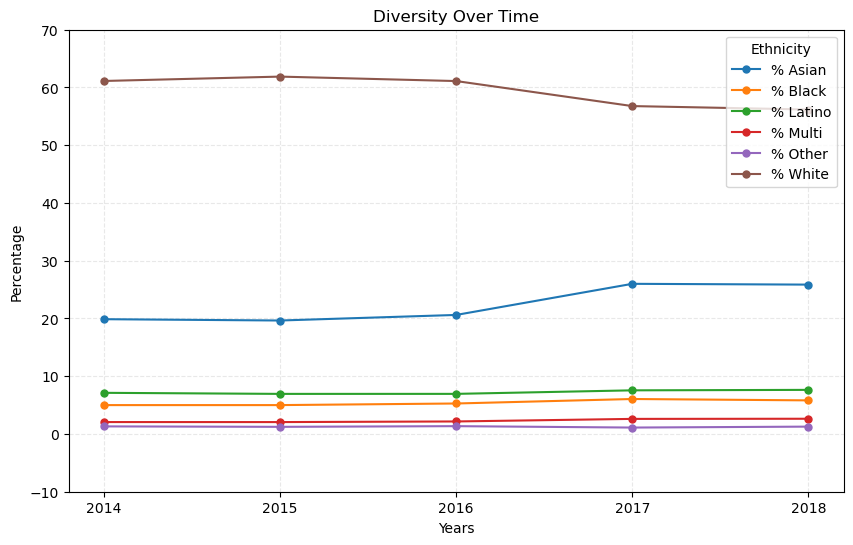

In [16]:
# Has racial diversity in the tech workplace increased over time?  

# 1. Get the data
pivot_df = df.pivot_table(index='Year', values=['% White', '% Asian', '% Latino', '% Black', '% Multi', '% Other'], aggfunc='mean') 

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o', linestyle='-', markersize=5)

# Customize the data
plt.title('Diversity Over Time')
plt.xlabel('Years')  
plt.ylabel('Percentage')
plt.xticks(pivot_df.index)
plt.yticks(range(-10, 71, 10))

# Create the legend and grid
plt.legend(title='Ethnicity')
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show and Save the plot
plt.savefig("./Images/DiversityOverTime.png")
plt.show()

In [17]:
# Calculating average 'Female %' per year
average_female = diversity_raw_df.groupby("Year")["Female %"].mean() 
average_female

Year
2014    34.000000
2015    35.058824
2016    35.222222
2017    35.000000
2018    37.181818
Name: Female %, dtype: float64

In [18]:
# Calculating average 'Male %' per year
average_male = diversity_raw_df.groupby("Year")["Male %"].mean() 
average_male

Year
2014    65.937500
2015    64.882353
2016    64.722222
2017    65.000000
2018    62.863636
Name: Male %, dtype: float64

In [19]:
# Creating df per gender per year
average_df = df.pivot_table(index='Year', values=['Female %', 'Male %'], aggfunc='mean') 
average_df

,Female %,Male %
Year,,
2014,34.000000,65.937500
2015,35.058824,64.882353
2016,35.222222,64.722222
2017,35.000000,65.000000
2018,37.181818,62.863636


<Axes: xlabel='Year'>

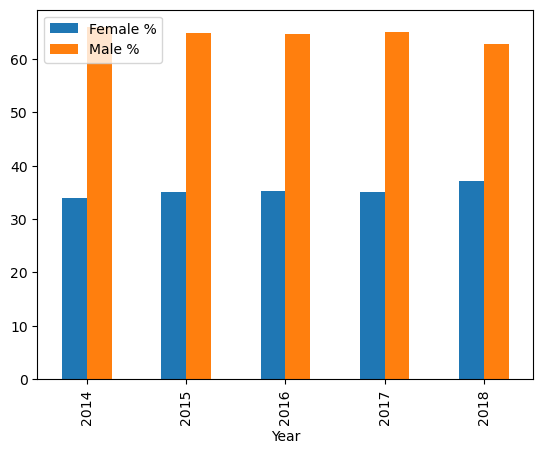

In [22]:
# Creating bar chart
average_df.plot(kind='bar')

In [ ]:
# What is the percentage of males vs females in the tech workplace over time?  


# Create the Canvas
#plt.figure(figsize=(8,6))

# Create the skeleton plot
#plt.bar(female_percentage, male_percentage, color="forestgreen")

# Customization
#plt.ylabel("Percentage", fontsize=12, fontstyle="italic")
#plt.title("Males vs Females Over Time", fontsize=16, fontweight="bold")
#plt.ylim(0, 70)
#plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

# Show/Save
#plt.show()



In [ ]:
# Which racial group has increased the most? 



The r-value is: 0.12619415936237163


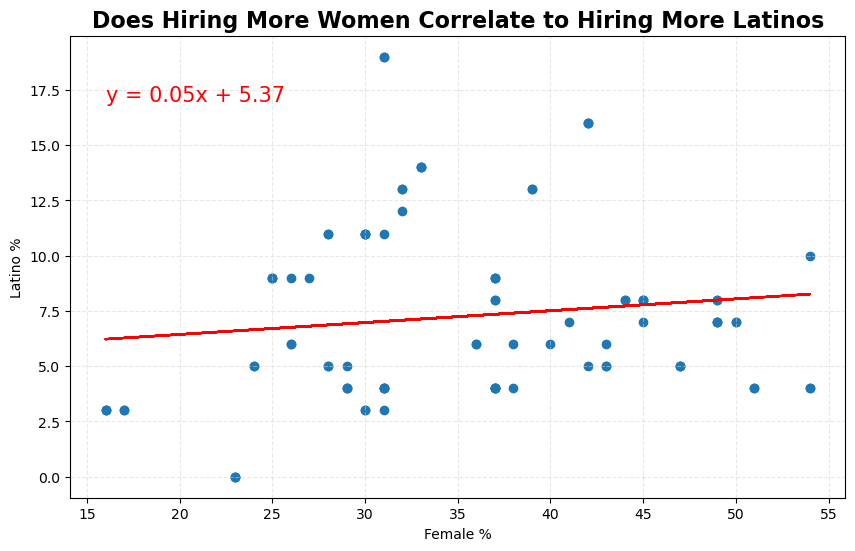

In [23]:
# Are companies that hire more Women more likely to hire Latinos? 

# 1. Get the data
x_values = df["Female %"]
y_values = df["% Latino"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
plt.scatter(x_values,y_values)

# Plot the regression line
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation
plt.annotate(line_eq, (16,17), fontsize=15, color="red")
plt.title('Does Hiring More Women Correlate to Hiring More Latinos', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Female %')
plt.ylabel('Latino %')
# plt.xlim(10, 60)
# plt.ylim(-0.5, 20)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

print(f"The r-value is: {rvalue}")

# 4. Display the scatter plot with the regression
plt.show()